In [1]:
import wandb
import pandas as pd

wandb.login()

wandb: Currently logged in as: jack-j-desmarais (jjd_academic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v11_adaptive_chunk_size_dataset'})
dfs = {}
for run in runs:
    # print(run.config)
    val_class_metrics = run.history(samples=1000, keys=['epoch', '_runtime','val_num_dead_features','val_loss','val_l1_loss','val_l2_loss','val_l0_norm','val_l1_norm','val_aux_loss'])
    train_metrics = run.history(samples=1000, keys=['epoch','train_num_dead_features','train_loss','train_l1_loss','train_l2_loss','train_l0_norm','train_l1_norm','train_aux_loss'])
    # print(f'{val_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not val_class_metrics.empty) and (not train_metrics.empty):
        val_class_metrics.loc[0,'epoch'] = -1
        metrics = pd.merge(left=val_class_metrics.drop(columns='_step'), right=train_metrics.drop(columns='_step'), on='epoch', how='outer')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'],run.config['cfg']['num_workers'])] = metrics
metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','num_workers','epoch']

metrics

Metrics                                                epoch      _runtime  \
dict_size topk topk_aux aux_penalty num_workers epoch                        
256       16   16       1.00        64          0         -1     74.734658   
                                                1          0    399.026497   
                                                2          1    687.374385   
                                                3          2    973.410846   
                                                4          3   1265.471385   
...                                                      ...           ...   
512       24   128      0.01        64          41        40  20569.181818   
                                                42        41  20569.190555   
                                                43        42  20798.055268   
                                                44        43  21291.902540   
                                                45        44  21780.634076   

Metrics                                                val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch                          
256       16   16       1.00        64          0                  10.874705   
                                                1                   0.210732   
                                                2                   0.578807   
                                                3                   1.889879   
                                                4                   1.858844   
...                                                                      ...   
512       24   128      0.01        64          41                447.999756   
                                                42                446.047119   
                                                43                447.786652   
                                                44                447.090637   
                                                45                447.999756   

Metrics                                                  val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch               
256       16   16       1.00        64          0      374.020721   
                                                1       22.752153   
                                                2       12.731694   
                                                3       10.826054   
                                                4        9.348509   
...                                                           ...   
512       24   128      0.01        64          41       0.434288   
                                                42       0.434142   
                                                43       0.433933   
                                                44       0.433712   
                                                45       0.433505   

Metrics                                                val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
256       16   16       1.00        64          0                0   
                                                1                0   
                                                2                0   
                                                3                0   
                                                4                0   
...                                                            ...   
512       24   128      0.01        64          41               0   
                                                42               0   
                                                43               0   
                                                44               0   
                                                45               0   

Metrics                                                val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch            

In [3]:
metrics.to_csv('./v11_adaptive_chunk_size_dataset-Training_traces.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v11_adaptive_chunk_size_dataset-Training_traces.csv',index_col=[0,1,2,3,4,5,6,7], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                                                     val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                              
256       16   16       1.00        64          0     -1      74.734658                 10.874705   
                                                1      0      399.026497                 0.210732   
                                                2      1      687.374385                 0.578807   
                                                3      2      973.410846                 1.889879   
                                                4      3      1265.471385                1.858844   
...                                                                                           ...   
512       24   128      0.01        64          41     40     20569.181818             447.999756   
                                                42     41     20569.190555             446.047119   
                                                43     42     20798.055268             447.786652   
                                                44     43     21291.902540             447.090637   
                                                45     44     21780.634076             447.999756   

Metrics                                                                       val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                   
256       16   16       1.00        64          0     -1      74.734658     374.020721   
                                                1      0      399.026497     22.752153   
                                                2      1      687.374385     12.731694   
                                                3      2      973.410846     10.826054   
                                                4      3      1265.471385     9.348509   
...                                                                                ...   
512       24   128      0.01        64          41     40     20569.181818    0.434288   
                                                42     41     20569.190555    0.434142   
                                                43     42     20798.055268    0.433933   
                                                44     43     21291.902540    0.433712   
                                                45     44     21780.634076    0.433505   

Metrics                                                                     val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       16   16       1.00        64          0     -1      74.734658               0   
                                                1      0      399.026497              0   
                                                2      1      687.374385              0   
                                                3      2      973.410846              0   
                                                4      3      1265.471385             0   
...                                                                                 ...   
512       24   128      0.01        64          41     40     20569.181818            0   
                                                42     41     20569.190555            0   
                                                43     42     20798.055268            0   
                                                44     43     21291.902540            0   
                                                45     44     21780.634076            0   

Metrics                                                                     val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       16   16       1.00        64          0     -1      74.734658      189.853455   
                                                1      0  

In [12]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ').strip() for col in to_plot.columns]
to_plot['val live features'] = to_plot['dict size'] - to_plot['val num dead features']
to_plot['train live features'] = to_plot['dict size'] - to_plot['train num dead features']
to_plot['running epoch time (sec)'] = to_plot['runtime']/to_plot['epoch']
to_plot['running epoch time (min)'] = to_plot['running epoch time (sec)']/60
display(to_plot)

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
0,256,16,16,1.00,64,0,-1,74.734658,10.874705,374.020721,...,NaN,NaN,NaN,NaN,NaN,NaN,245.125295,NaN,inf,inf
1,256,16,16,1.00,64,1,0,399.026497,0.210732,22.752153,...,59.173969,0.0,37.110226,15.999944,283.716461,22.063787,255.789268,254.908710,399.026497,6.650442
2,256,16,16,1.00,64,2,1,687.374385,0.578807,12.731694,...,15.933737,0.0,12.022991,15.999944,295.743561,3.910754,255.421193,255.736385,343.687192,5.728120
3,256,16,16,1.00,64,3,2,973.410846,1.889879,10.826054,...,10.104864,0.0,6.624357,15.999944,296.739655,3.480505,254.110121,255.449773,324.470282,5.407838
4,256,16,16,1.00,64,4,3,1265.471385,1.858844,9.348509,...,9.025315,0.0,5.033653,15.999944,290.778656,3.991657,254.141156,255.013484,316.367846,5.272797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,512,24,128,0.01,64,41,40,20569.181818,447.999756,0.434288,...,0.432922,0.0,0.428647,24.000107,279.227844,0.004275,64.000244,64.477753,501.687361,8.361456
3315,512,24,128,0.01,64,42,41,20569.190555,446.047119,0.434142,...,0.432688,0.0,0.428429,24.000107,279.205872,0.004258,65.952881,64.450256,489.742632,8.162377
3316,512,24,128,0.01,64,43,42,20798.055268,447.786652,0.433933,...,0.432508,0.0,0.428232,24.000107,279.186554,0.004277,64.213348,65.512970,483.675704,8.061262
3317,512,24,128,0.01,64,44,43,21291.902540,447.090637,0.433712,...,0.432303,0.0,0.428039,24.000107,279.168762,0.004264,64.909363,64.613831,483.906876,8.065115


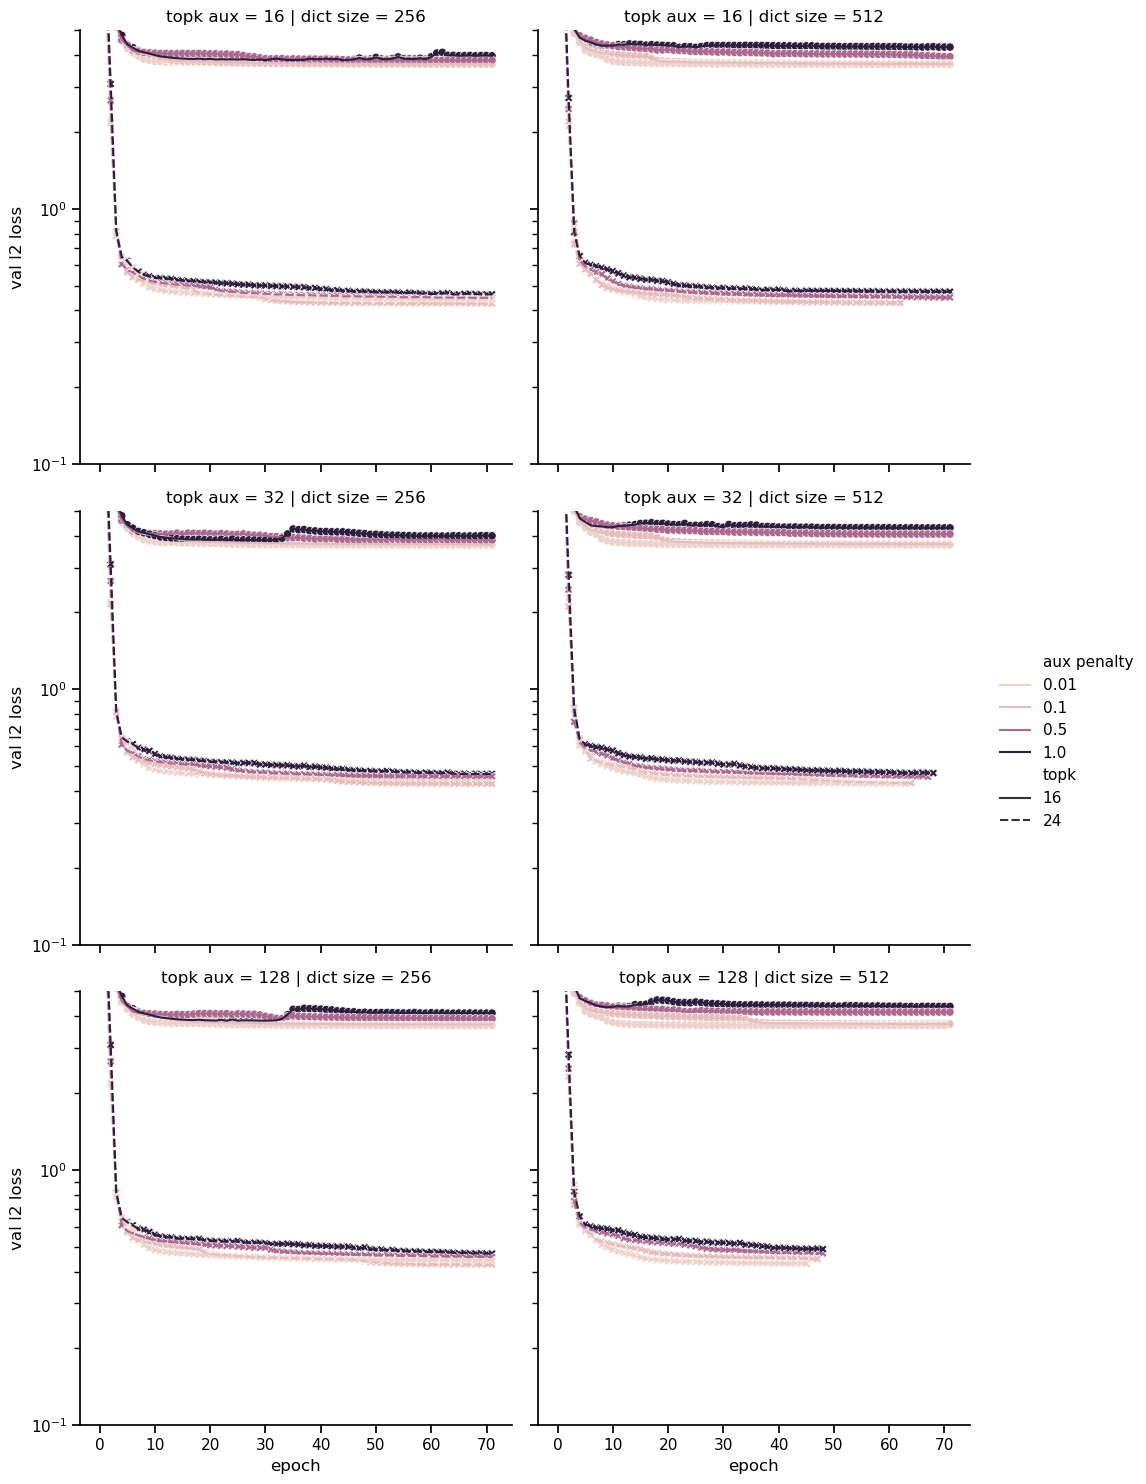

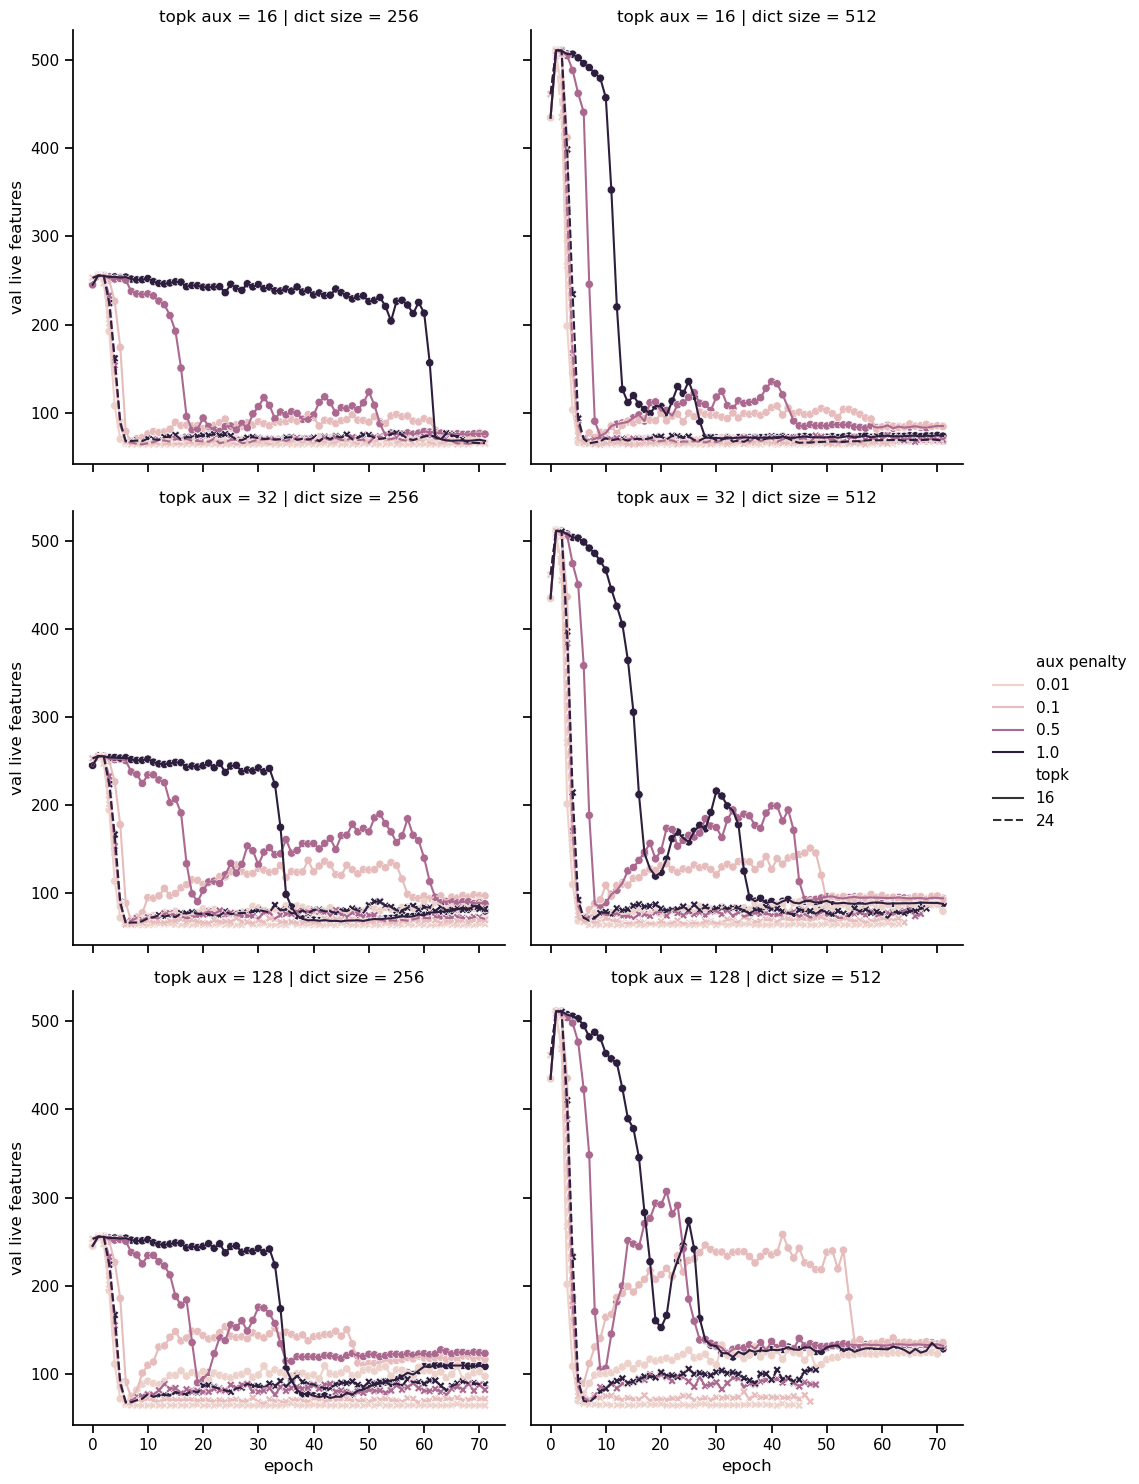

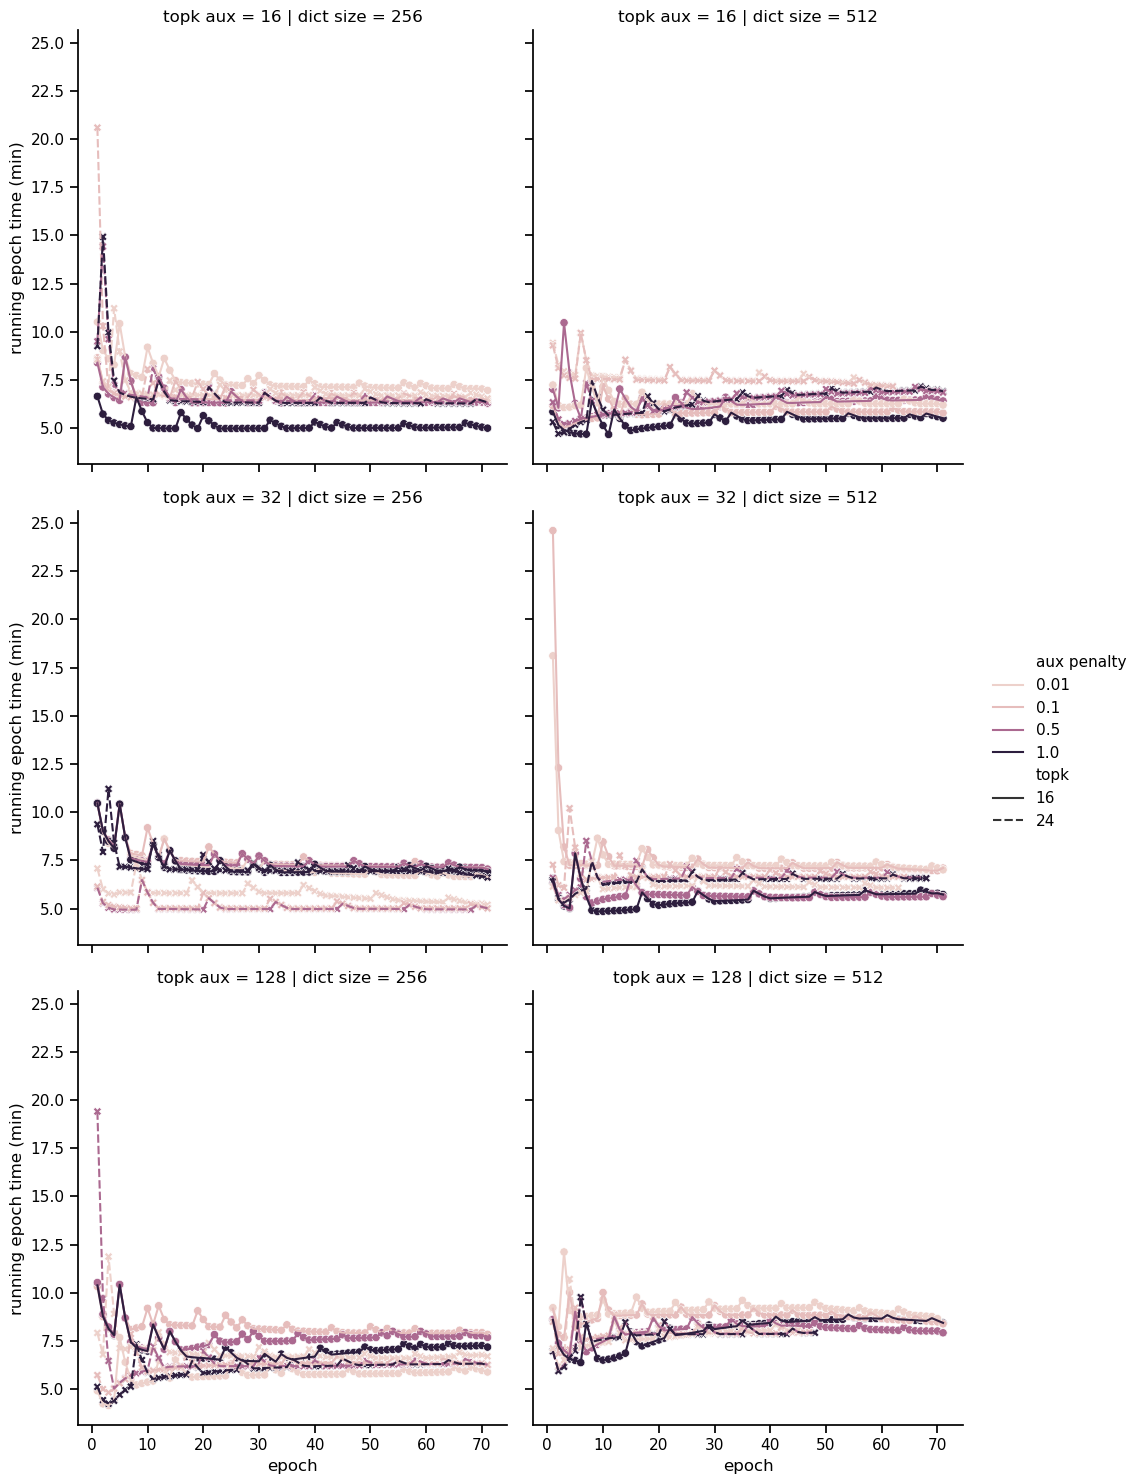

In [14]:
test_cols = ['val l2 loss','val live features', 'running epoch time (min)']
to_plot['num workers'] = pd.Categorical(to_plot['num workers'])


for col in test_cols:
    g= sns.relplot(data=to_plot, kind='line',
                x= 'epoch', y=col, 
                hue='aux penalty',
                style='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                style='topk', hue='aux penalty')
    # g.refline(x=20, color='k', linestyle='--', alpha=0.5)
    # g.refline(x=39, color='k', linestyle='--', alpha=0.5)
    if col == 'val l2 loss':
        plt.ylim(0.1,5)
        plt.yscale('log')
        
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

In [15]:
bar = to_plot.loc[to_plot.groupby(['topk aux','topk','dict size', 'aux penalty'], observed=True)['val loss'].idxmin()]
bar

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
143,256,16,16,0.01,64,71,70,29644.770829,188.173569,3.708519,...,NaN,NaN,NaN,NaN,NaN,NaN,67.826431,NaN,417.531984,6.958866
359,256,16,16,0.10,64,71,70,27160.000511,181.222092,4.013791,...,NaN,NaN,NaN,NaN,NaN,NaN,74.777908,NaN,382.535218,6.375587
503,256,16,16,0.50,64,71,70,26774.644213,180.221863,5.344370,...,NaN,NaN,NaN,NaN,NaN,NaN,75.778137,NaN,377.107665,6.285128
71,256,16,16,1.00,64,71,70,21302.546513,187.915298,6.891747,...,NaN,NaN,NaN,NaN,NaN,NaN,68.084702,NaN,300.035866,5.000598
1151,512,16,16,0.01,64,71,70,26408.582873,444.345734,3.715291,...,NaN,NaN,NaN,NaN,NaN,NaN,67.654266,NaN,371.951871,6.199198
1079,512,16,16,0.10,64,71,70,24647.443243,427.758728,4.016158,...,NaN,NaN,NaN,NaN,NaN,NaN,84.241272,NaN,347.147088,5.785785
1007,512,16,16,0.50,64,71,70,27308.729964,427.118561,5.501648,...,NaN,NaN,NaN,NaN,NaN,NaN,84.881439,NaN,384.629999,6.410500
935,512,16,16,1.00,64,71,70,23502.349336,438.526917,7.176313,...,NaN,NaN,NaN,NaN,NaN,NaN,73.473083,NaN,331.019005,5.516983
2013,256,24,16,0.01,64,70,69,27878.290448,190.770889,0.446292,...,0.444620,0.0,0.440224,24.000107,288.395966,0.004397,65.229111,64.270325,398.261292,6.637688
1941,256,24,16,0.10,64,70,69,27398.973871,189.606262,0.468068,...,0.467004,0.0,0.425043,24.000107,278.715759,0.041961,66.393738,66.658020,391.413912,6.523565


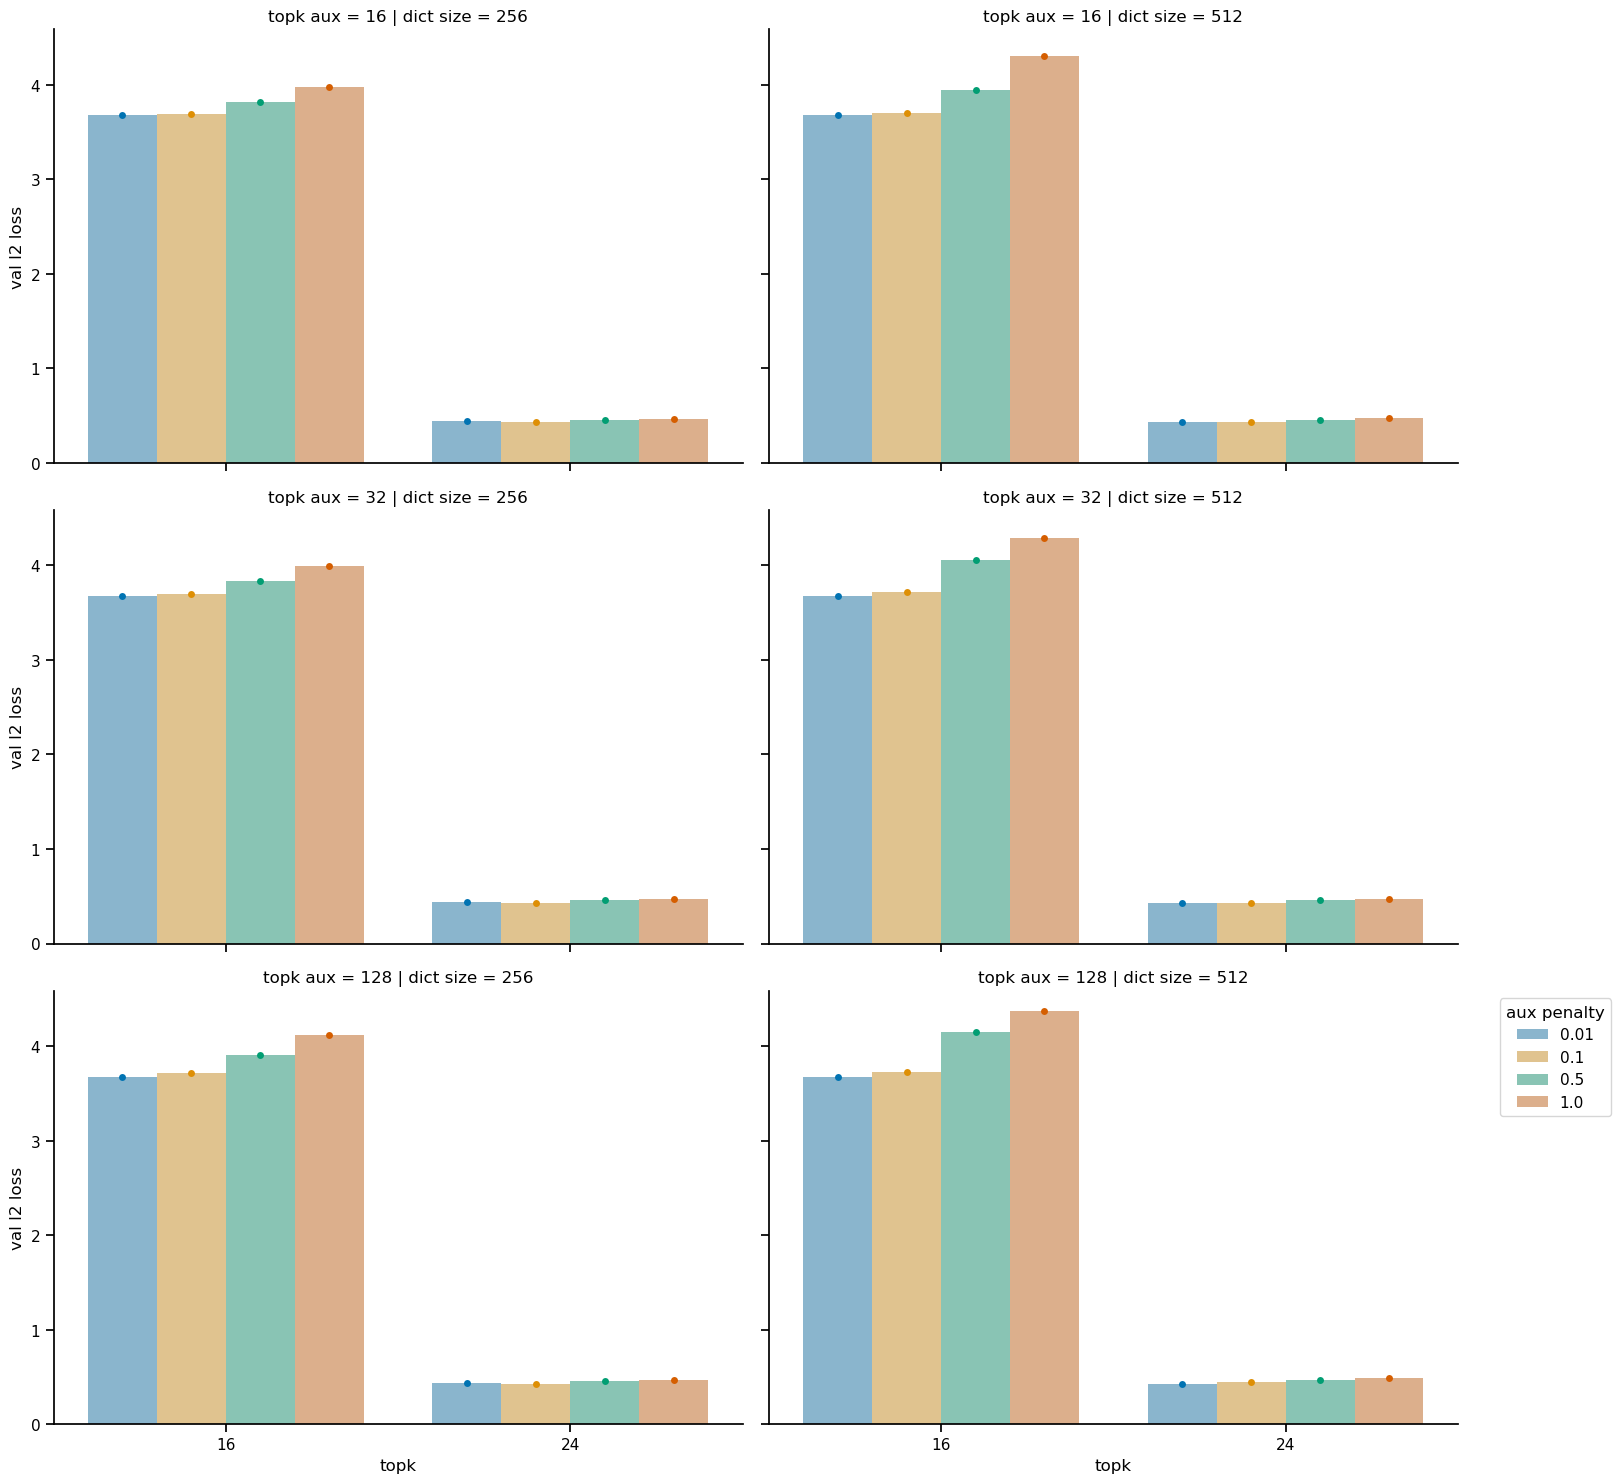

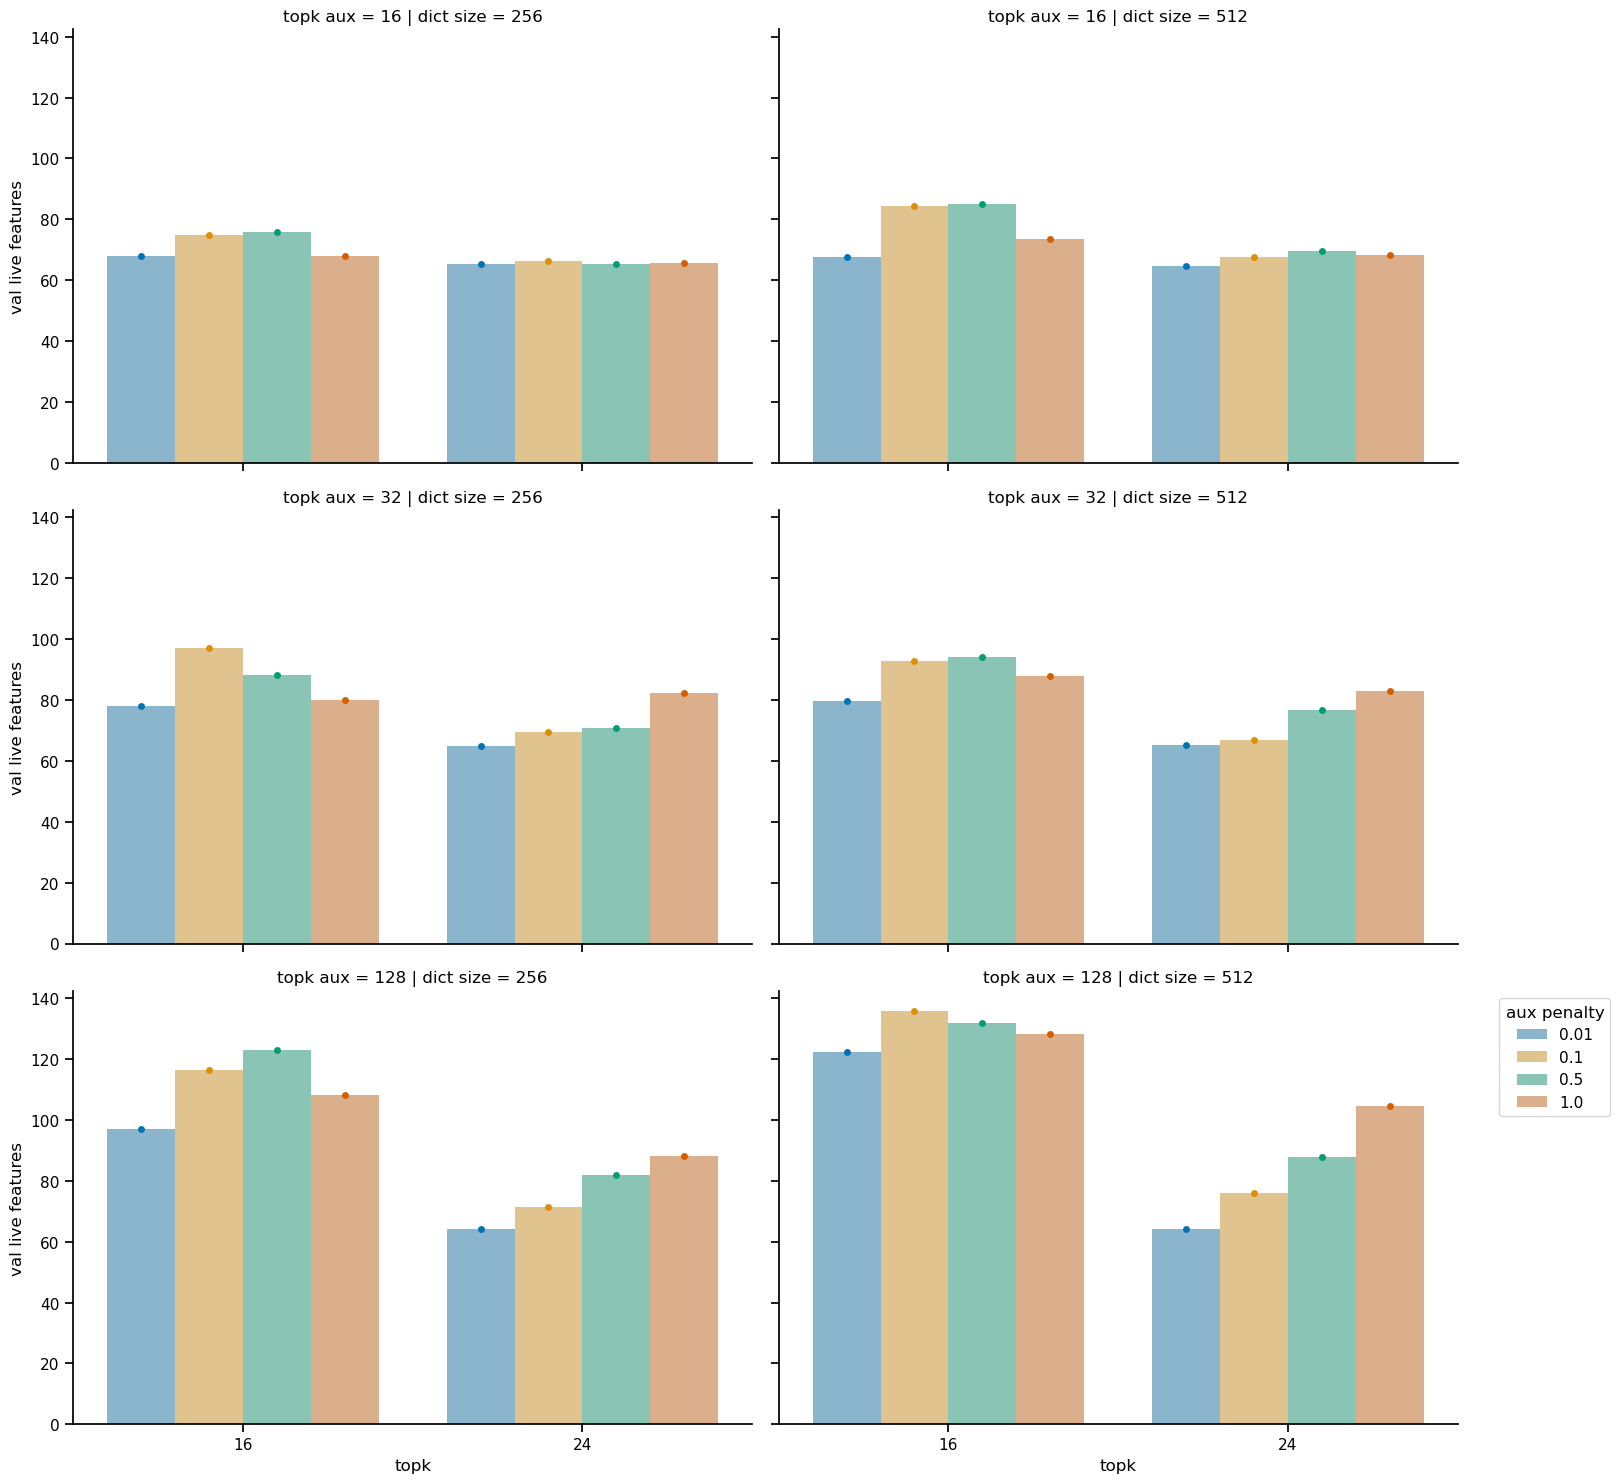

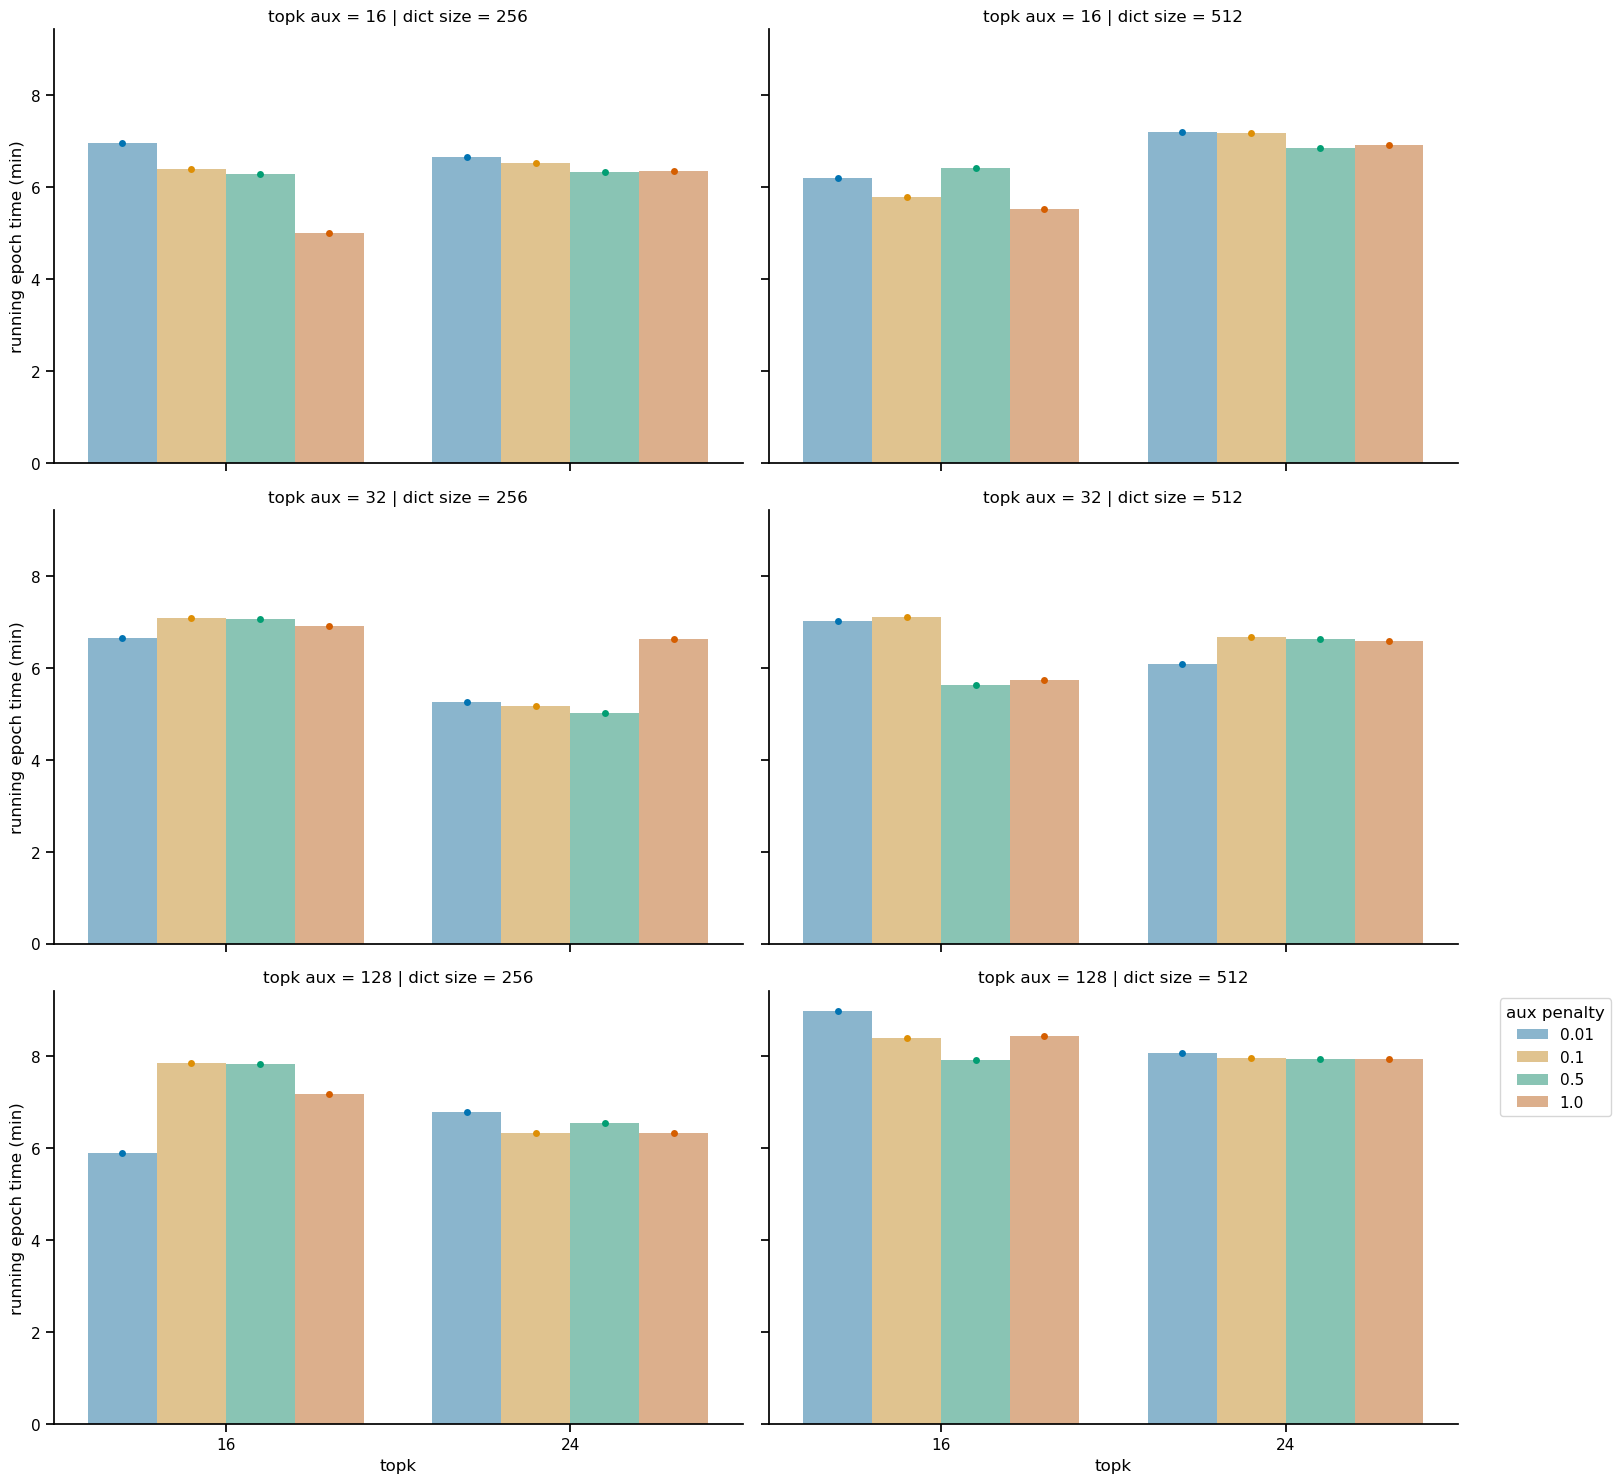

In [17]:
bar_plot = bar.copy()
# bar_plot['topk aux'] = 2 ** np.round(np.log2(bar_plot['topk aux']))

bar_plot['aux penalty'] = bar_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=bar_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [19]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v11_adaptive_chunk_size_dataset'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    test_class_metrics = run.history(samples=1000, keys=['test_num_dead_features','test_loss','test_l1_loss','test_l2_loss','test_l0_norm','test_l1_norm','test_aux_loss'])
    # print(f'{test_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not test_class_metrics.empty):
        metrics = test_class_metrics.drop(columns='_step')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','epoch']

metrics

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       16   16       1.00        0                  188.709686   6.885789   
                        0.01        0                  187.645157   3.718402   
               128      1.00        0                  148.806458   6.653996   
                        0.10        0                  143.645157   4.009285   
               16       0.10        0                  182.290298   4.024207   
               32       0.10        0                  162.000015   4.004097   
               16       0.50        0                  182.290314   5.350721   
               32       0.01        0                  179.806458   3.716761   
               128      0.50        0                  138.161285   5.316499   
               32       0.50        0                  173.580658   5.189340   
                        1.00        0                  179.645157   6.703944   
               128      0.01        0                  161.709686   3.715322   
512       16   16       1.00        0                  440.096741   7.181814   
                        0.50        0                  429.806427   5.517773   
                        0.10        0                  429.999969   4.025203   
                        0.01        0                  444.193542   3.725305   
               32       1.00        0                  428.064423   7.072677   
                        0.50        0                  424.290375   5.522179   
                        0.10        0                  424.806488   4.012682   
                        0.01        0                  434.483826   3.724393   
               128      1.00        0                  391.838715   6.659990   
                        0.50        0                  391.128998   5.368442   
                        0.10        0                  393.548370   3.985318   
                        0.01        0                  396.096771   3.714357   
256       24   16       1.00        0                  190.838730   0.898502   
                        0.50        0                  189.838699   0.664435   
                        0.10        0                  189.612900   0.469464   
                        0.01        0                  190.774139   0.447596   
               32       1.00        0                  174.580627   0.908127   
                        0.01        0                  190.999969   0.447168   
               128      1.00        0                  167.193558   0.918402   
               32       0.50        0                  184.612869   0.671678   
                        0.10        0                  186.483856   0.469986   
               128      0.50        0                  173.967758   0.677089   
                        0.10        0                  184.451599   0.469669   
                        0.01        0                  192.000000   0.447196   
512       24   16       1.00        0                  444.580627   0.912618   
                        0.50        0                  442.741882   0.668877   

Metrics                                    test_l1_loss  test_l2_loss  \
dict_size topk topk_aux aux_penalty epoch                               
256       16   16       1.00        0                 0      3.984905   
                        0.01        0                 0      3.684978   
               128      1.00        0                 0      4.124478   
                        0.10        0                 0      3.722795   
               16       0.10        0                 0      3.704068   
               32       0.10        0                 0      3.709240   
               16       0.50        0                 0      3.824362   
               32       0.01        0                 0      3.684342   
               128      0.50        0                 0      3.920173

In [20]:
metrics.to_csv('./v11_adaptive_chunk_size_dataset-test_results.csv')

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v11_adaptive_chunk_size_dataset-test_results.csv',index_col=[0,1,2,3,4], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       16   16       1.00        0                  188.709686   6.885789   
                        0.01        0                  187.645157   3.718402   
               128      1.00        0                  148.806458   6.653996   
                        0.10        0                  143.645157   4.009285   
               16       0.10        0                  182.290298   4.024207   
               32       0.10        0                  162.000015   4.004097   
               16       0.50        0                  182.290314   5.350721   
               32       0.01        0                  179.806458   3.716761   
               128      0.50        0                  138.161285   5.316499   
               32       0.50        0                  173.580658   5.189340   
                        1.00        0                  179.645157   6.703944   
               128      0.01        0                  161.709686   3.715322   
512       16   16       1.00        0                  440.096741   7.181814   
                        0.50        0                  429.806427   5.517773   
                        0.10        0                  429.999969   4.025203   
                        0.01        0                  444.193542   3.725305   
               32       1.00        0                  428.064423   7.072677   
                        0.50        0                  424.290375   5.522179   
                        0.10        0                  424.806488   4.012682   
                        0.01        0                  434.483826   3.724393   
               128      1.00        0                  391.838715   6.659990   
                        0.50        0                  391.128998   5.368442   
                        0.10        0                  393.548370   3.985318   
                        0.01        0                  396.096771   3.714357   
256       24   16       1.00        0                  190.838730   0.898502   
                        0.50        0                  189.838699   0.664435   
                        0.10        0                  189.612900   0.469464   
                        0.01        0                  190.774139   0.447596   
               32       1.00        0                  174.580627   0.908127   
                        0.01        0                  190.999969   0.447168   
               128      1.00        0                  167.193558   0.918402   
               32       0.50        0                  184.612869   0.671678   
                        0.10        0                  186.483856   0.469986   
               128      0.50        0                  173.967758   0.677089   
                        0.10        0                  184.451599   0.469669   
                        0.01        0                  192.000000   0.447196   
512       24   16       1.00        0                  444.580627   0.912618   
                        0.50        0                  442.741882   0.668877   

Metrics                                    test_l1_loss  test_l2_loss  \
dict_size topk topk_aux aux_penalty epoch                               
256       16   16       1.00        0                 0      3.984905   
                        0.01        0                 0      3.684978   
               128      1.00        0                 0      4.124478   
                        0.10        0                 0      3.722795   
               16       0.10        0                 0      3.704068   
               32       0.10        0                 0      3.709240   
               16       0.50        0                 0      3.824362   
               32       0.01        0                 0      3.684342   
               128      0.50        0                 0      3.920173

In [22]:
test_plot = metrics.reset_index()
test_plot.columns = [col.replace('_', ' ') for col in test_plot.columns]
test_plot['test live features'] = test_plot['dict size'] - test_plot['test num dead features']
display(test_plot)

,dict size,topk,topk aux,aux penalty,epoch,test num dead features,test loss,test l1 loss,test l2 loss,test l0 norm,test l1 norm,test aux loss,test live features
0,256,16,16,1.00,0,188.709686,6.885789,0,3.984905,16,245.468765,2.900885,67.290314
1,256,16,16,0.01,0,187.645157,3.718402,0,3.684978,16,250.200333,0.033424,68.354843
2,256,16,128,1.00,0,148.806458,6.653996,0,4.124478,16,242.535004,2.529518,107.193542
3,256,16,128,0.10,0,143.645157,4.009285,0,3.722795,16,248.818741,0.286490,112.354843
4,256,16,16,0.10,0,182.290298,4.024207,0,3.704068,16,248.849762,0.320139,73.709702
5,256,16,32,0.10,0,162.000015,4.004097,0,3.709240,16,248.789978,0.294856,93.999985
6,256,16,16,0.50,0,182.290314,5.350721,0,3.824362,16,246.760544,1.526359,73.709686
7,256,16,32,0.01,0,179.806458,3.716761,0,3.684342,16,250.113083,0.032420,76.193542
8,256,16,128,0.50,0,138.161285,5.316499,0,3.920173,16,246.980789,1.396327,117.838715
9,256,16,32,0.50,0,173.580658,5.189340,0,3.848749,16,246.032578,1.340590,82.419342


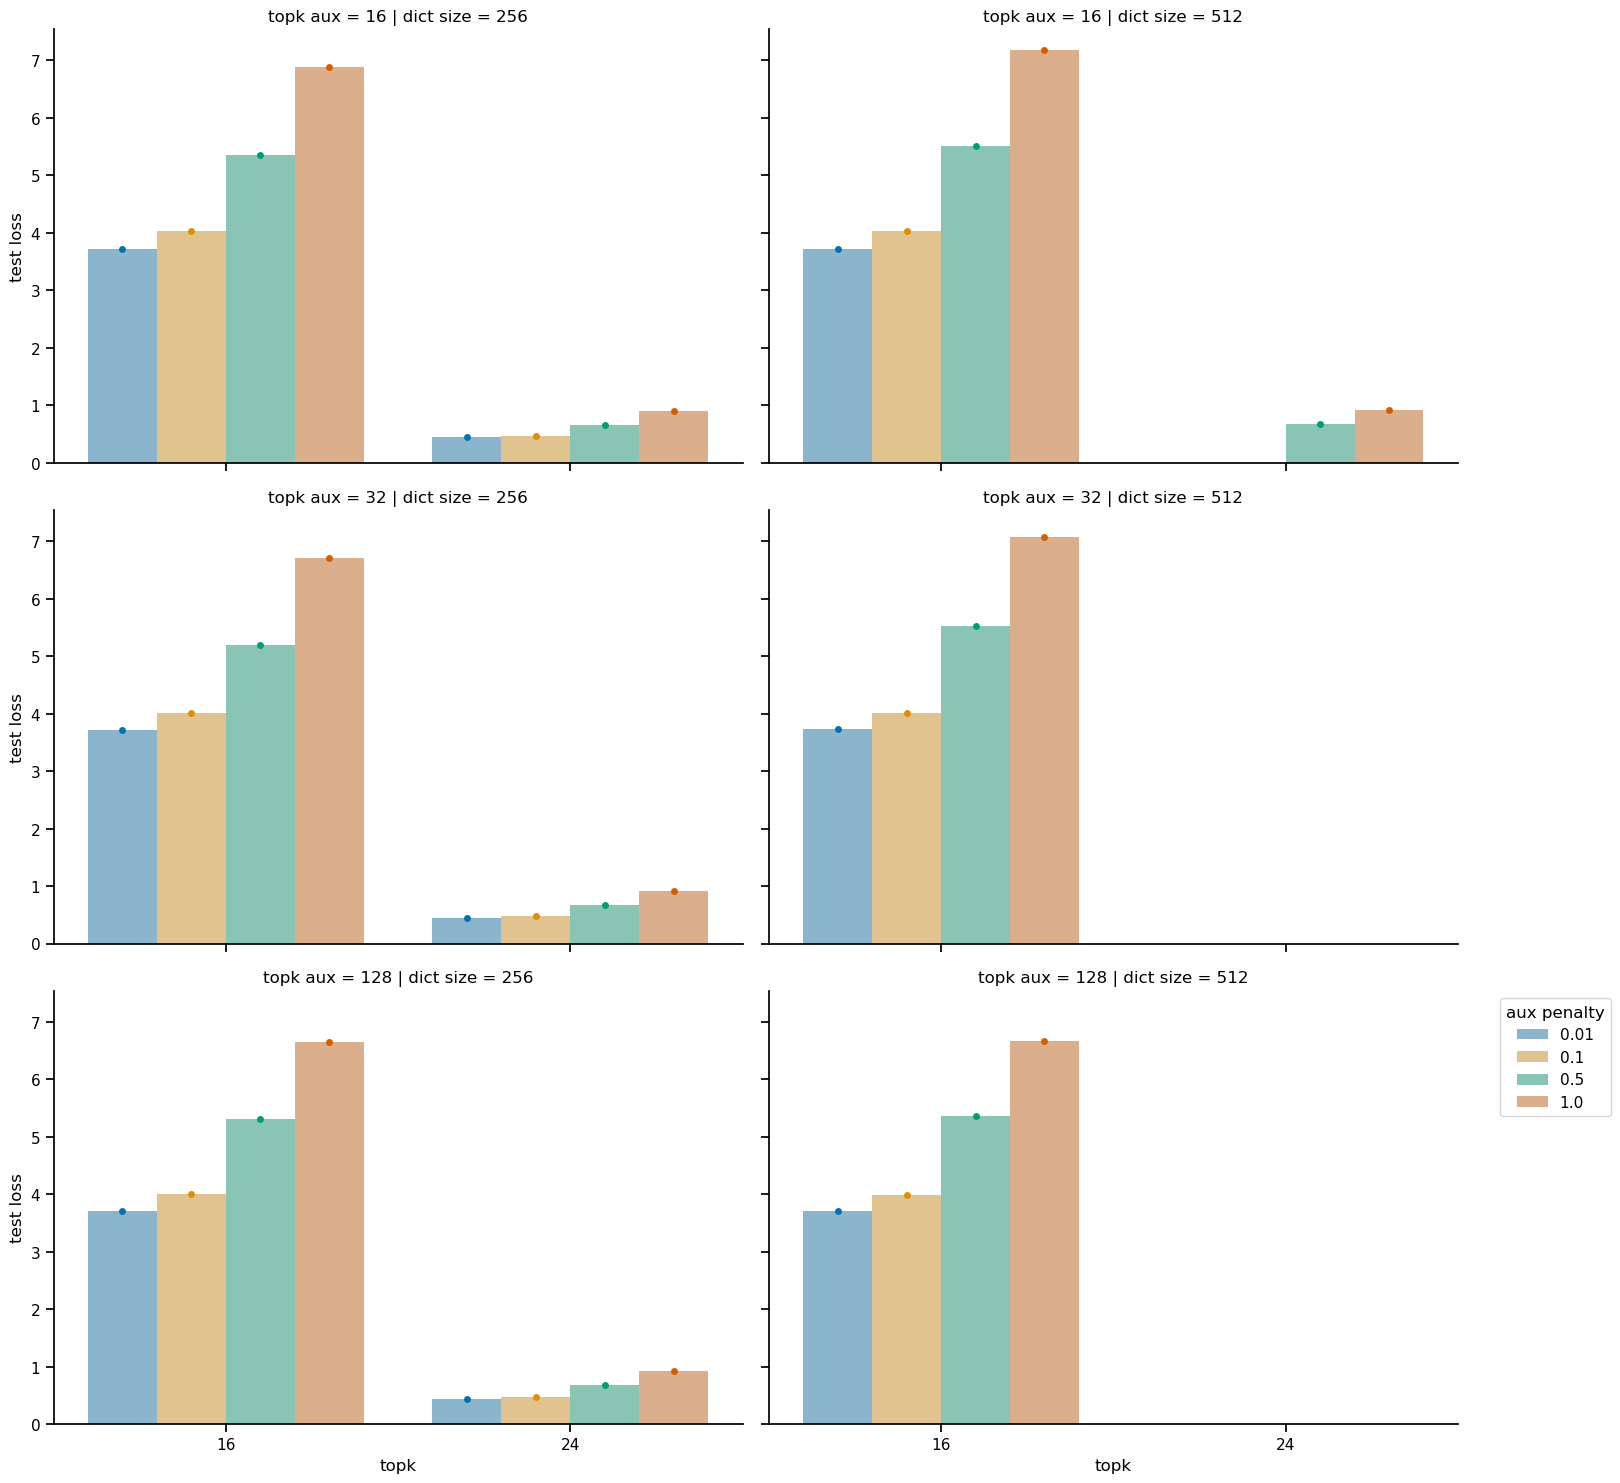

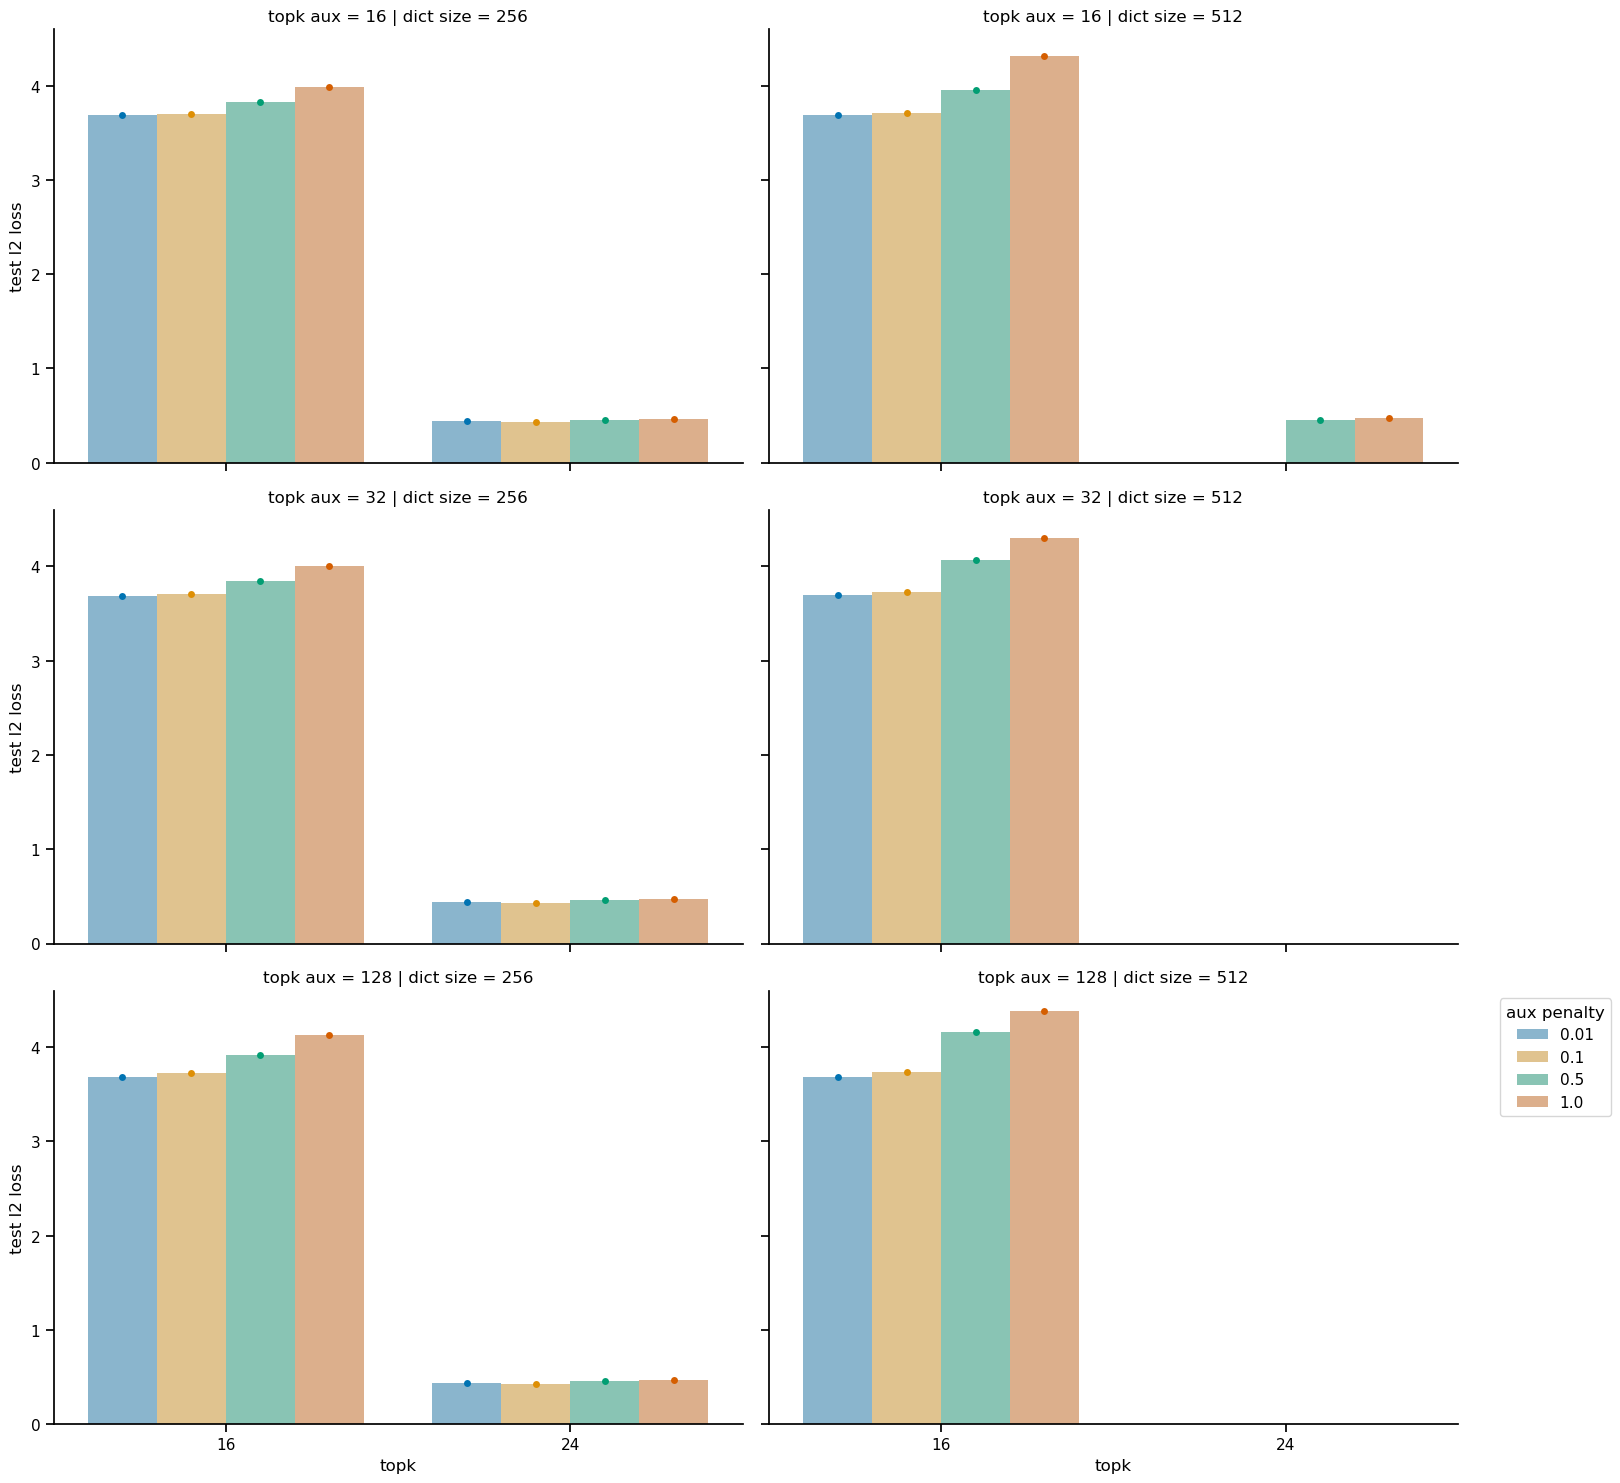

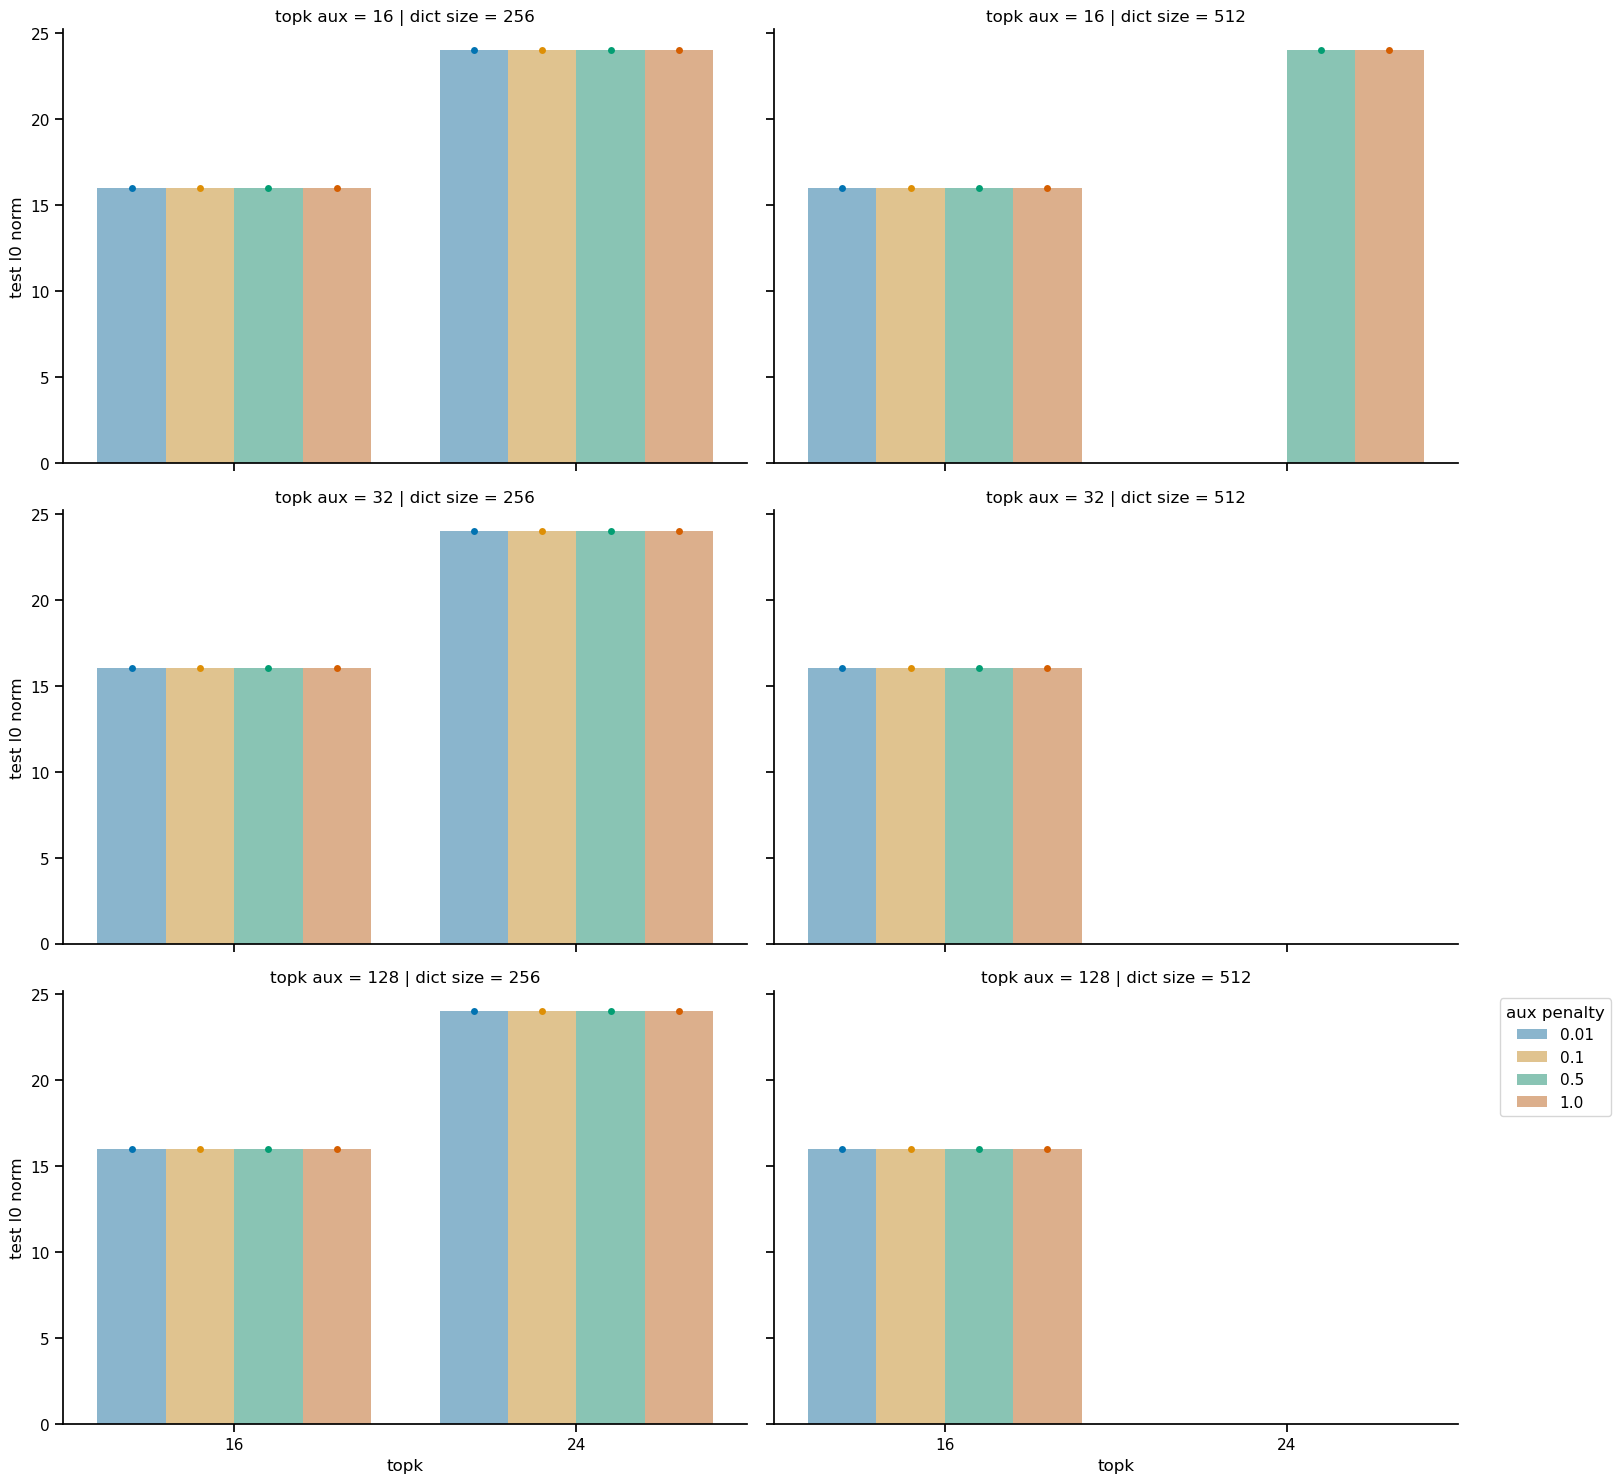

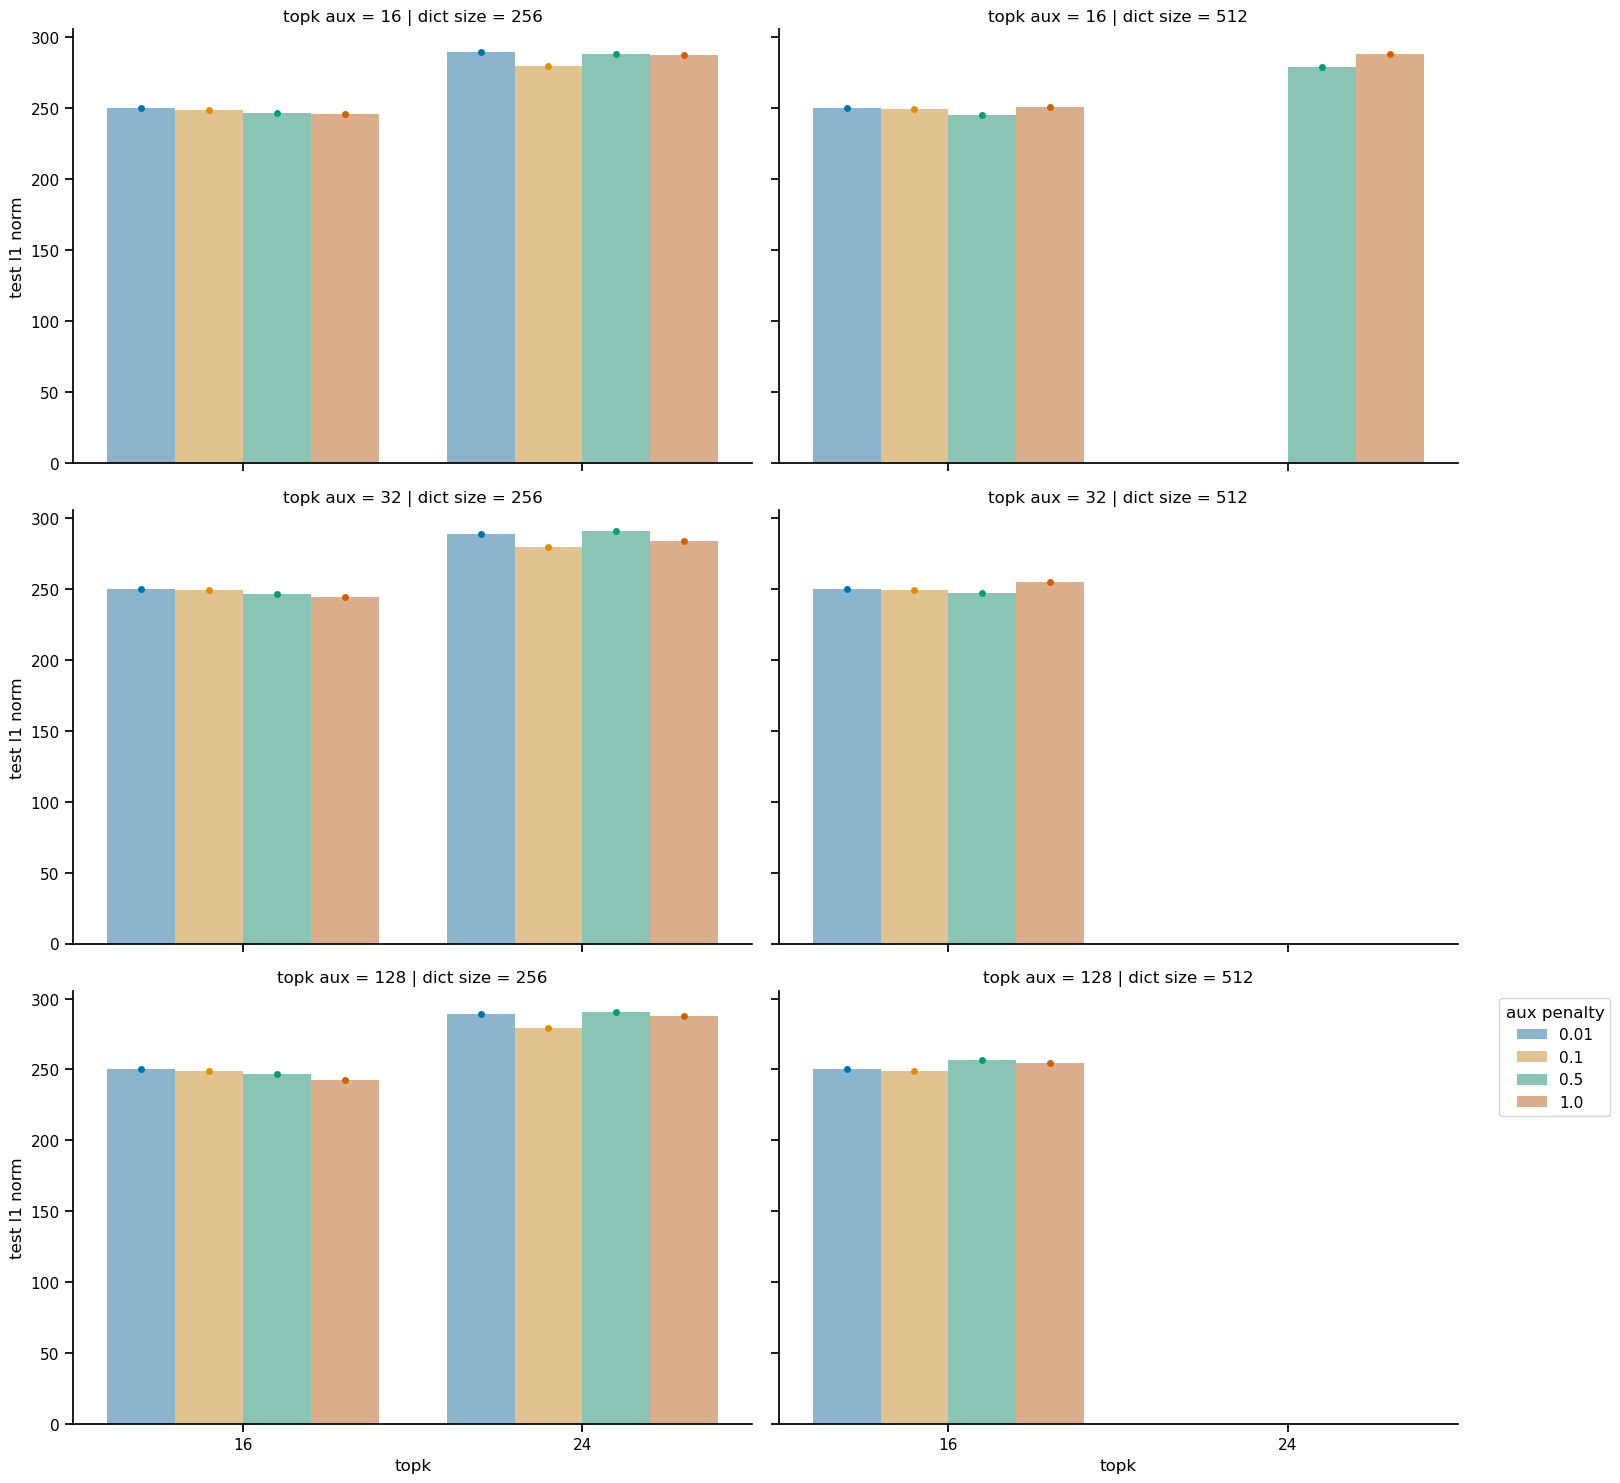

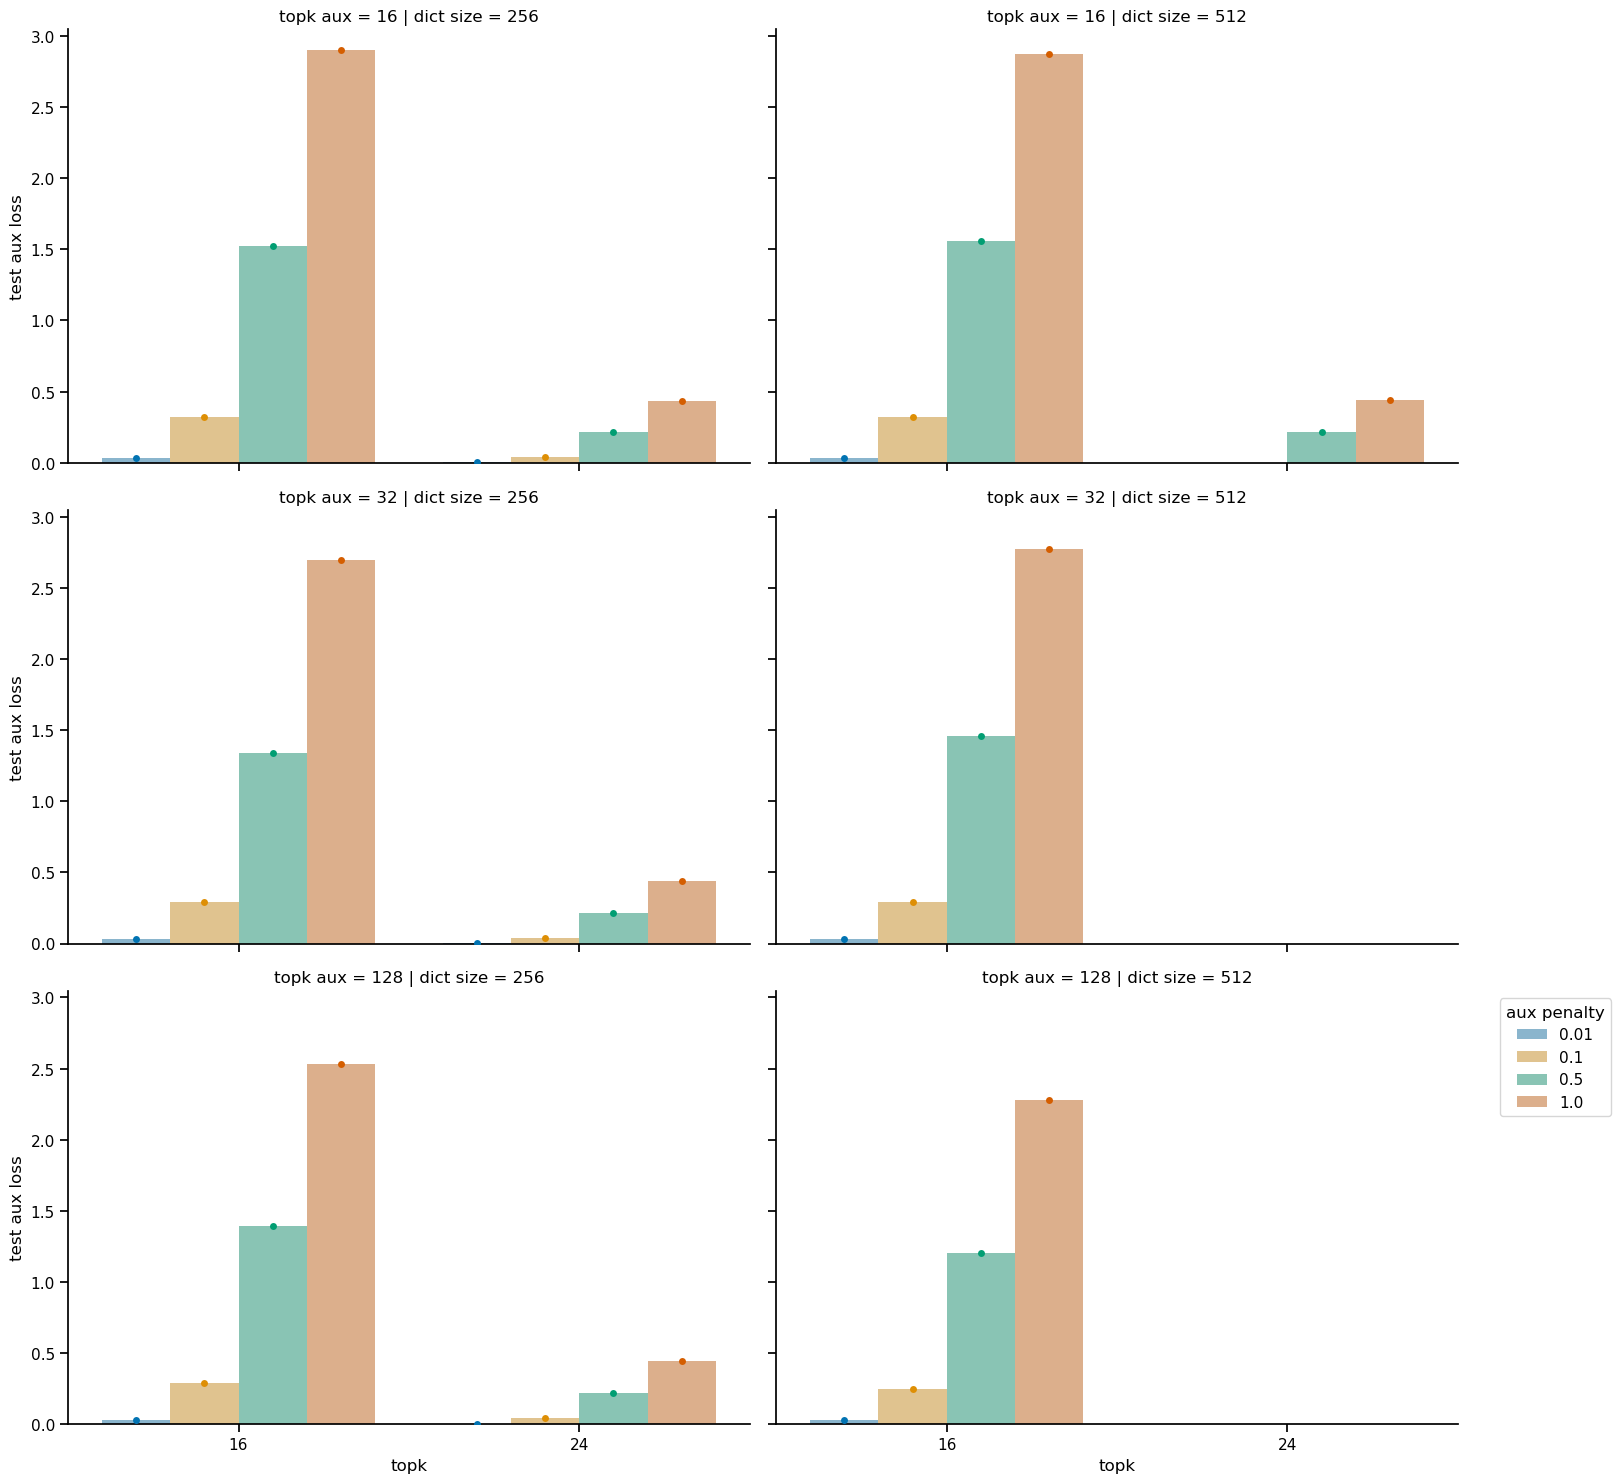

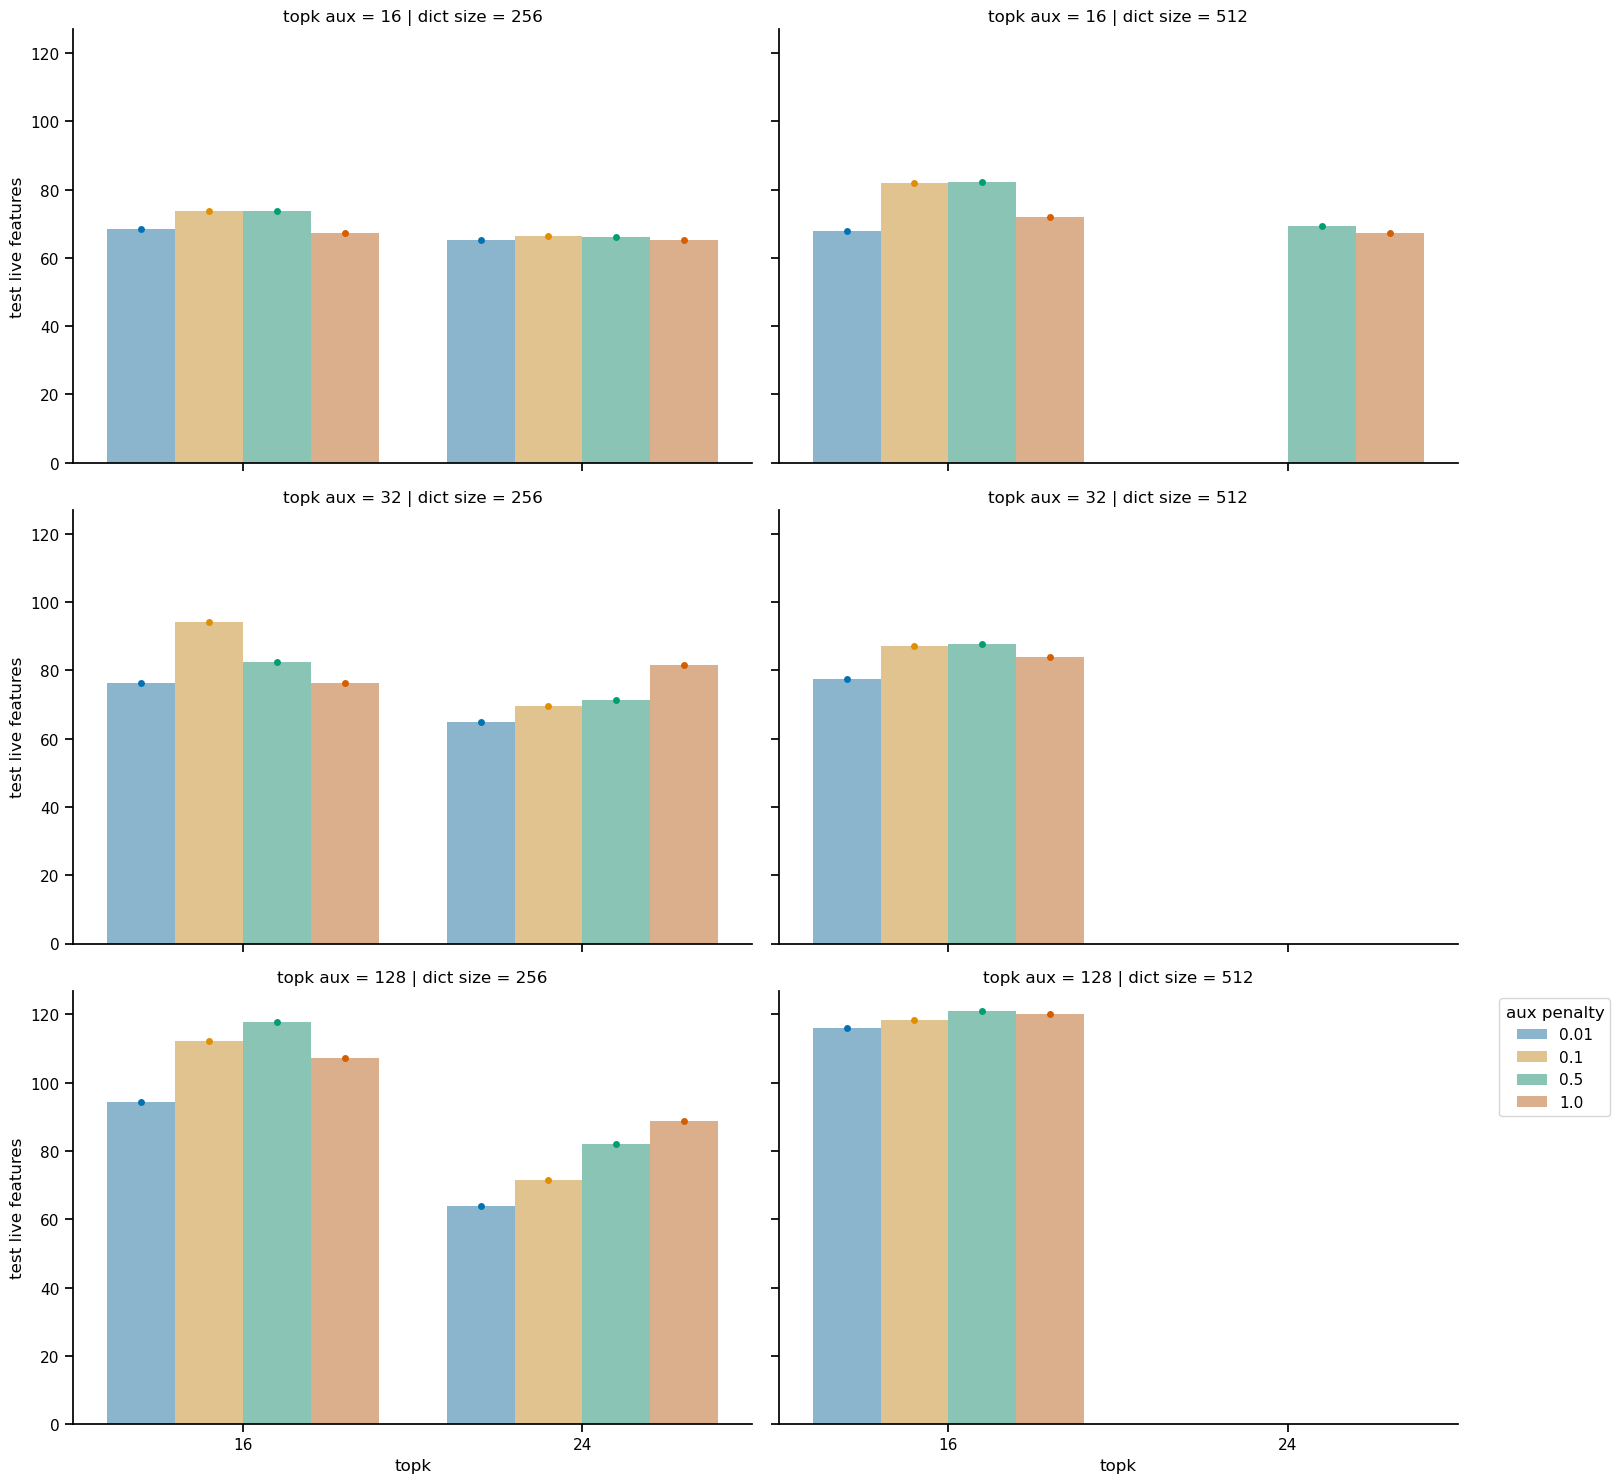

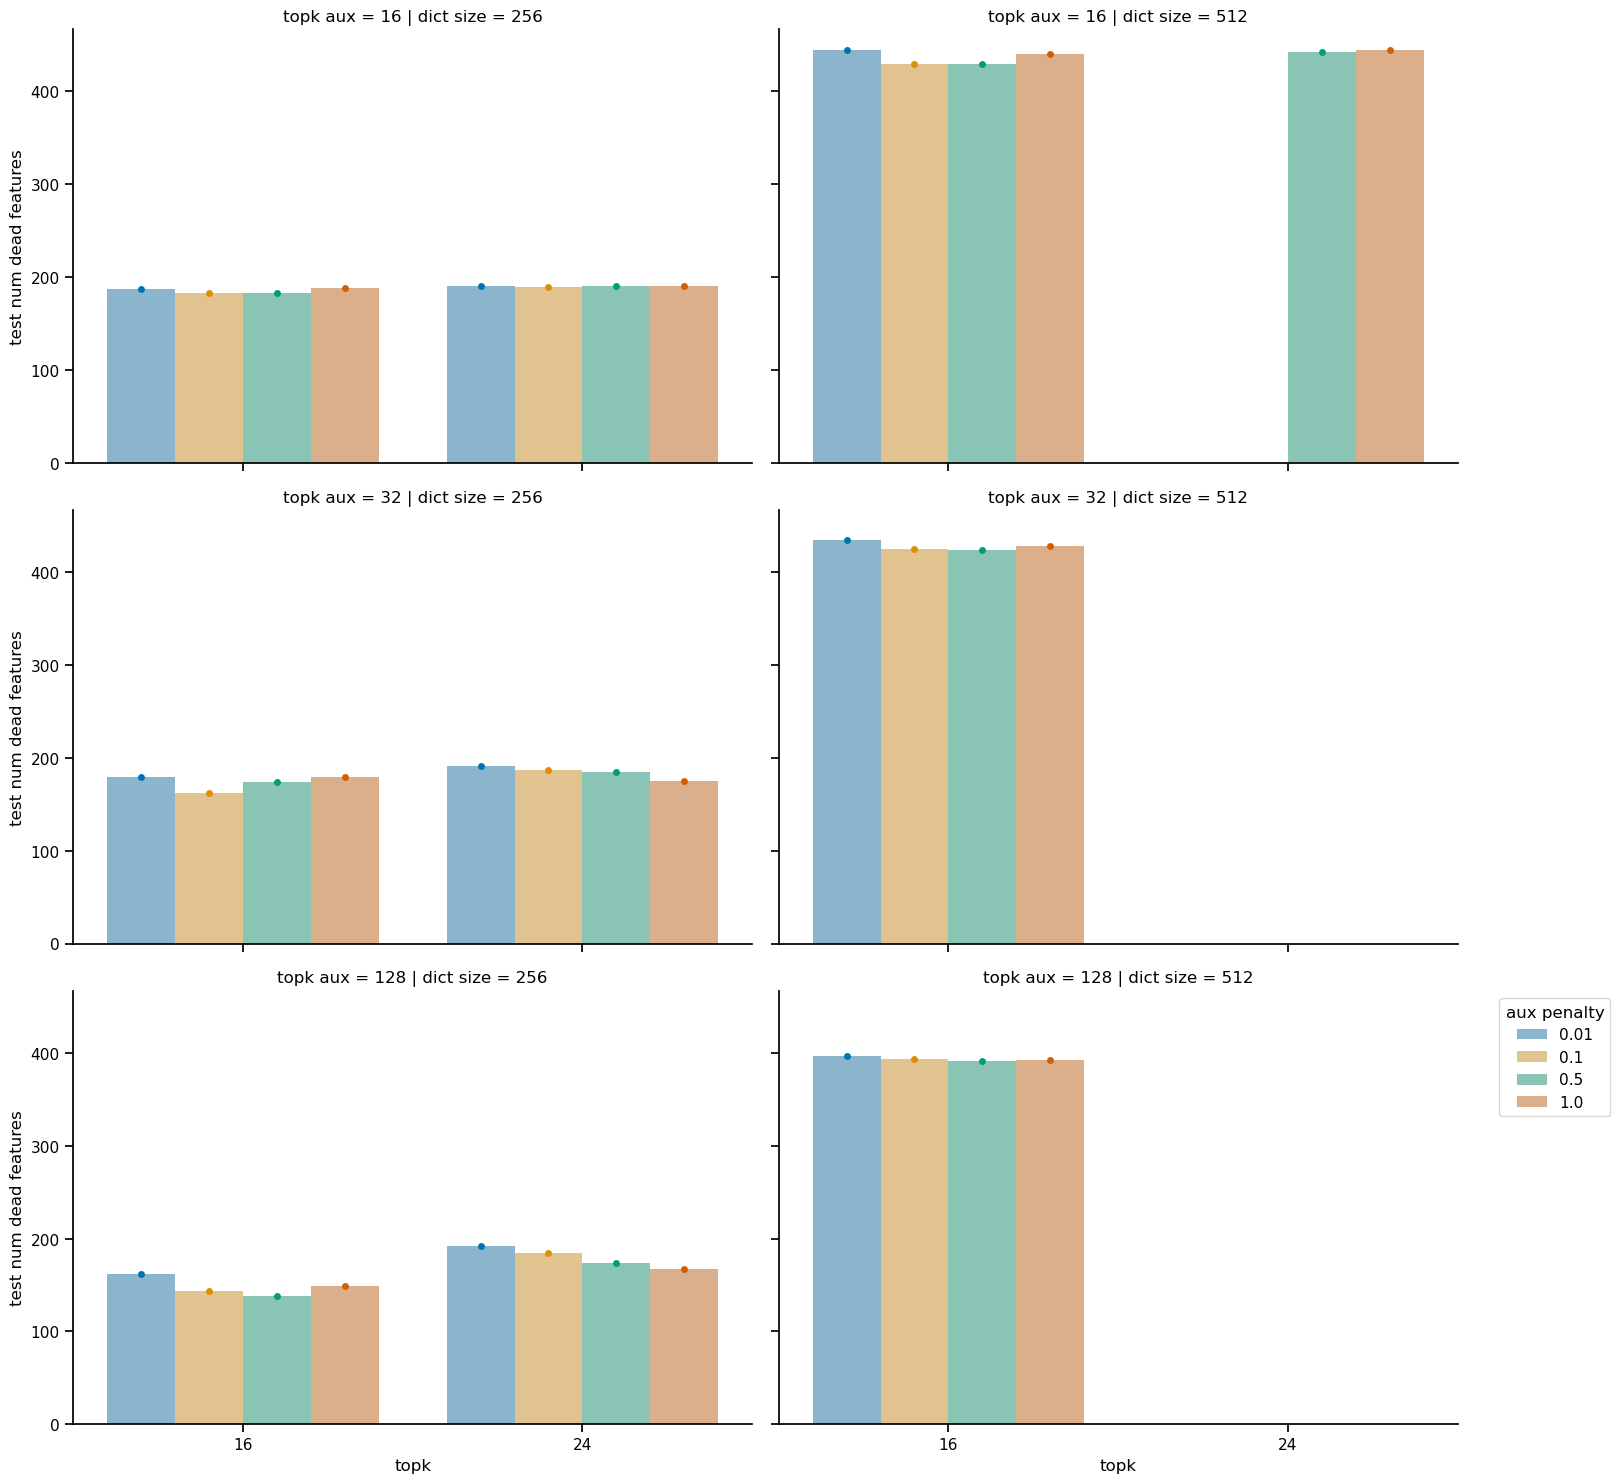

In [24]:
test_cols = ['test loss', 'test l2 loss', 'test l0 norm', 'test l1 norm', 'test aux loss','test live features','test num dead features']

test_plot['aux penalty'] = test_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=test_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')
